# Линейная алгебра. Лабораторная работа 1, осень 2019

# Пешехонов Иван БПМИ1912

В этой лабораторной работе вы познакомитесь со средой Jupyter Notebook и библиотеками numpy и scipy.

## Часть 1. Библиотеки

В этой лабораторной работе вам понадобятся три библиотеки:

- `numpy` - основная библиотека для работы с матрицами;
- `scipy`, а точнее модуль `scipy.linalg`, содержащий множество функций линейной алгебры;
- `matplotlib` - графическая библиотека

Подключить их можно следующим образом:

In [42]:
# Запустите этот код
import numpy as np

import scipy.linalg as sla

import matplotlib.pyplot as plt
%matplotlib inline

Теперь вы можете позвать, скажем, функцию `scipy.linalg.det()` с помощью кода `sla.det()`, а функцию `numpy.exp()` - с помощью кода `np.exp()`.

**Основные объекты и операции линейной алгебры в NumPy и SciPy:**

Основной объект, с которым вам придётся работать и в этой, и в следующих лабораторных - это, безусловно, матрицы. В библиотеке `numpy` они представлены классом `numpy.ndarray`. Матрицу можно создать из двумерного (а на самом деле и не только двумерного) массива следующим образом:

In [43]:
# Запустите этот код
A = np.array([[1, 2, 3], [4, 5, 6]])

print(A)
print(A.shape) # пара (число строк, число столбцов)

[[1 2 3]
 [4 5 6]]
(2, 3)


Обратите внимание, что матрица заполняется *по строкам*.

Есть и много других конструкторов матриц. Например, единичная матрица размера $n\times n$ создаётся с помощью функции `numpy.eye(n)`. Со всем многообразием конструкторов можно ознакомиться [на этой странице](https://docs.scipy.org/doc/numpy-1.10.1/reference/routines.array-creation.html).

Зачастую бывает нужно получить доступ к подматрицам данной матрицы, и numpy предоставляет множество удобных средств, как это сделать (называется slicing):
- элемент с номером `(i,j)`: `A[i,j]`
- i-я строка матрицы: `A[i,:]`
- j-й столбец матрицы: `A[:,j]`

**Внимание!** Оба варианта, и `A[i,:]`, и `A[:,j]` дают не строку или столбец, а одномерный вектор. Если вы хотите получить вектор-строку или вектор-столбец соответственно, используйте вот такой синтаксис: `A[i:i+1,:]`, и `A[:,j:j+1]`
- строки с нулевой по i-ю: `A[:i+1,:]`
- столбцы с j-го по последний: `A[:,j:]`
- строки с i-й по k-ю: `A[i:k,:]`

В некоторых случаях нужно получить доступ к (прямоугольной) подматрице, элементы которой находятся на пересечении строк из списка `rows` и столбцов `columns`. В этом случае `A[rows, columns]` даст не то, что вы ожидаете (можете попробовать это сделать сами и увидеть, что получится; только возьмите `rows` и `columns` одного размера). Справиться с этой задачей позволяет код `A[np.ix_(rows, columns)]`

*Умножение матриц* производится с помощью оператора `np.dot()`. Есть два варианта написания: `A.dot(B)` и `np.dot(A, B)`.

Обычные знаки арифметических действий (`+`, `-`, `*`) зарезервированы для поэлементных операций. Например, `A * B` - это матрица, элементами которой являются произведения $A_{ij}B_{ij}$. Помимо этих есть и множество других поэлементных операций. Например, `numpy.exp(A)` - это матрица, элементами которой являются экспоненты элементов матрицы `A`.

Чтобы получить матрицу, *транспонированную* к матрице `A`, напишите просто `A.T`. 

В некоторых случаях бывает нужно создавать *случайные матрицы*: например, при проведении экспериментов или для инициализации итеративных методов. Средства для этого предоставляет пакет [numpy.random](https://docs.scipy.org/doc/numpy/reference/routines.random.html). Так, `np.random.rand(m,n)` - это матрица $m\times n$, элементы которой независимо выбраны из равномерного распределения на интервале `[0;1)` 

Для *решения систем линейных уравнений* в пакете `scipy.linalg` есть множество методов, рассмотрение которых выходит за пределы курса линейной алгебры. Мы вам пока предлагаем пользоваться функцией `scipy.linalg.solve`, основанной на методе Гаусса. Отметим, что `scipy.linalg.solve(A, B)` выдаёт решение уравнения $AX = B$ (или ошибку), где $B$ может быть как вектором, так и матрицей.

Найти обратную матрицу для матрицы $A$ можно с помощью функции `sla.inv(A)`.

**Копирование сложных объектов в Python**

Когда вы делаете присваивание каких-то сложных объектов, как правило оно происходит по ссылке. Например, код
```
B = A
B[0,0] = 10
```
приведёт к изменению матрицы `A`.

Не попадайтесь в эту ловушку! Если вы хотите работать с копией как с независимой матрицей, используйте метод `copy()`:
```
B = A.copy()
```

**Где искать помощь**

Библиотеки `numpy` и `scipy` снабжены прекрасной документацией. Если у вас возникают вопросы о том, как работает та или иная функция (или даже как называется функция, выполняющая то, что вам нужно), вы почти всегда можете найти там ответы.

[Ссылка на документацию пакета scipy.linalg](https://docs.scipy.org/doc/scipy-0.18.1/reference/linalg.html)

**И всё-таки задание**

В качестве первого задания мы попросим вас отыскать соответствующие функции в библиотеке и сделать следующее:

- создайте нулевую матрицу $Z$ размера $3\times4$;

- создайте диагональную матрицу $5\times5$ с диагональными элементами 1, 2, 3, 4 и 5;

- найдите её след (не силою мысли, а с помощью библиотечных функций, конечно);

- найдите обратную к ней матрицу;

- сгенерируйте случайную матрицу $X$ размера $4\times5$;

- найдите определитель подматрицы матрицы $X$, расположенной на пересечении 2 и 3 строки и 1 и 2 столбца; считаем, что строки и столбцы нумеруются с единицы (используйте slicing!). Такой определитель называется **минором** матрицы $X$;

- найдите произведение $X^TX$.

Пожалуйста, каждый пункт делайте в новом блоке и не забывайте распечатывать результаты.

А сейчас я создам нулевую матрицу

In [16]:
z = np.zeros((3, 4))
z

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

Создаю диагональную матрицу $5×5$ с диагональными элементами 1, 2, 3, 4 и 5;

In [8]:
mat = np.zeros((5, 5))
np.fill_diagonal(mat, [1, 2, 3, 4, 5])
mat

array([[1., 0., 0., 0., 0.],
       [0., 2., 0., 0., 0.],
       [0., 0., 3., 0., 0.],
       [0., 0., 0., 4., 0.],
       [0., 0., 0., 0., 5.]])

Ищу след диагональной матрицы mat

In [10]:
mat.trace()

15.0

Ищу обратную матрицу

In [14]:
sla.inv(mat)

array([[ 1.        ,  0.        , -0.        ,  0.        , -0.        ],
       [ 0.        ,  0.5       , -0.        ,  0.        , -0.        ],
       [ 0.        ,  0.        ,  0.33333333,  0.        , -0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.25      , -0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.2       ]])

Генерирую случайную матрицу X 

In [3]:
x = np.random.rand(4, 5)
x

array([[0.45284641, 0.70267116, 0.51874757, 0.32505672, 0.25736558],
       [0.10359342, 0.29151194, 0.84086208, 0.75527471, 0.97617384],
       [0.36634126, 0.27243527, 0.22989706, 0.33028681, 0.28703733],
       [0.02924208, 0.9611752 , 0.47706917, 0.18649184, 0.7954095 ]])

Ищу определитель подматрицы матрицы $X$, расположенной на пересечении 2 и 3 строки и 1 и 2 столбца

In [7]:
new_x = x.copy()
ьштщк = new_x[np.ix_([2, 3], [1, 2])]
sla.det(minor)

-0.0910008802833504

Ищу произведение $X^TX$

In [8]:
x.T.dot(x)

array([[0.35086248, 0.47631187, 0.42019202, 0.35189335, 0.34608531],
       [0.47631187, 1.5768047 , 1.13080941, 0.71781268, 1.30813667],
       [0.42019202, 1.13080941, 1.25659573, 0.96860572, 1.39978973],
       [0.35189335, 0.71781268, 0.96860572, 0.81997034, 1.06407985],
       [0.34608531, 1.30813667, 1.39978973, 1.06407985, 1.73421911]])

## Часть 2. Время

Питон мотивирует пользоваться библиотечными функциями, когда они доступны, а не писать собственные. Библиотечные функции основаны на современных алгоритмах, обычно пишутся на более эффективных языках, таких как C++ или Fortran, а, кроме того, оптимизированы для работы на многопроцессорных устройствах, так что обогнать эти решения просто так вы не сможете.

Мы предлагаем вам убедиться в этом самим. Напишите функцию `my_det`, которая вычисляла бы определитель матрицы с помощью элементарных преобразований над строками. Функция должна выкидывать `ValueError` в случаях, если матрица не является квадратной.

In [38]:
def my_det(X):
    '''
    Parameters
    ----------
    X : array_like
    
    Returns
    -------
    det : float
        Determinant of `a`.
    '''
    X = np.array(X, dtype="float64") #  Просто надаа
    if X.shape[0] != X.shape[1]:
        raise ValueError()
        
    elif X.shape[0] == 1:
        return X[0, 0]
    
    else:
        vector = X[:, 0]
        swap = 2
        max_num = max(vector)
        if max_num == 0: # если столбец нулей, то определитель 0
            return 0
        id_max = vector.argmax(axis=0)
        
        if id_max != 0: #  Проверка на то, что ведущий элемент не равен нулю, если равен - свапнуть строки и сменить знак
            save = X[0].copy()
            X[0] = X[id_max];
            X[id_max] = save
            swap -= 1
            
        for i in range(1, X.shape[0]):
            multiply_koeff = X[i, 0] / X[0, 0]
            X[i] -= multiply_koeff * X[0]
            
        return (-1) ** swap * X[0, 0] * \
               my_det(X[np.ix_(range(1, X.shape[0]), range(1, X.shape[1]))])

Простая проверка:

In [35]:
# Запустите этот блок кода
X = np.array([[0,0,1], [0,1,0], [1,0,0]])
print(X)
print(my_det(X))

[[0 0 1]
 [0 1 0]
 [1 0 0]]
-1.0


На случай, если нам просто повезло с этой матрицей, имеет смысл написать чуть более хитрые тесты. Мы сгенерируем несколько случайных матриц $8\times8$ с помощью функции `numpy.random.rand` и сравним ответ, выдаваемый нашей функцией, с настоящим определителем (результатом работы библиотечной функции `scipy.linalg.det`):

In [36]:
# Запустите этот блок кода
for _ in range(10):
    X = np.random.rand(8,8)
    if np.abs(my_det(X) - sla.det(X)) > 1e-6:
        print('FAILED')

Если вы ни разу не получили `FAILED`, то ваша функция работает правильно.

Теперь давайте сравним скорость работы вашей функции и библиотечной функции `scipy.linalg.det`. В Питоне есть несколько способов измерения времени; мы воспользуемся декоратором `%timeit`. Будучи написан перед функцией, он запускает её некоторое количество раз, выбирает три случайных запуска и возвращает длительность самого быстрого из них. Модификатор `-o` между декоратором и функцией позволяет сохранять результаты работы декоратора в переменную.

Приготовьтесь, что следующий блок может работать сравнительно долго.

85.7 µs ± 23.8 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
939 µs ± 2.44 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
7.03 ms ± 334 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
45.4 ms ± 424 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
42.8 ms ± 809 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


/home/the_borderliner/.local/lib/python3.5/site-packages/ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in double_scalars


10.6 s ± 235 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


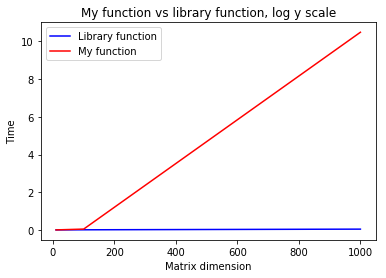

In [37]:
# Запустите этот блок кода
lib_times = []
my_times = []
dimensions = [10, 100, 1000]
for dim in dimensions:
    A = np.random.rand(dim, dim)
    res_lib = %timeit -o sla.det(A)
    lib_times.append(res_lib.best)
    res_my = %timeit -o my_det(A)
    my_times.append(res_my.best)    

plt.plot(dimensions, lib_times, color='blue', label='Library function')
plt.plot(dimensions, my_times, color='red', label='My function')
plt.title('My function vs library function, log y scale')
plt.ylabel('Time')
plt.xlabel('Matrix dimension')
plt.legend()


***Вывод:*** Моя супербыстрая функция, реализовывающая наиболее оптимальный алгорим поиска определителя через элементарные преобразования работает медленнее библиотечной :(

У вас должны были получиться графики, показывающие, как растёт с ростом размерности матрицы время вычисления определителя. Поскольку они вышли не больно-то красивыми, мы нарисуем их в *логарифмическом масштабе* по оси у:

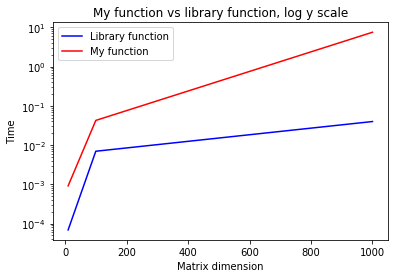

In [6]:
# Запустите этот блок кода
plt.semilogy(dimensions, lib_times, color='blue', label='Library function')
plt.semilogy(dimensions, my_times, color='red', label='My function')
plt.title('My function vs library function, log y scale')
plt.ylabel('Time')
plt.xlabel('Matrix dimension')
plt.legend()

Вы можете убедиться, что библиотечная функция работает *гораздо* быстрее.

## Часть 3. Точность

Наверняка вы уже что-то знаете про floating point arithmetics и связанные с этим трудности и понимаете, что на компьютере вычисления с вещественными числами производятся лишь с ограниченной точностью. 

В качестве первого примера, показывающего различие между длинной арифметикой целых чисел и floating point arithmetics, предлагаем вам перемножить две пары матриц:

$$
\begin{pmatrix}
1 & 0\\
10^{20} & 1
\end{pmatrix}
\cdot
\begin{pmatrix}
10^{-20} & 1\\
0 & 1 - 10^{20}
\end{pmatrix}
$$
и
$$
\begin{pmatrix}
1. & 0.\\
10.^{20} & 1.
\end{pmatrix}
\cdot
\begin{pmatrix}
10.^{-20} & 1.\\
0. & 1. - 10.^{20}
\end{pmatrix}
$$
Во втором случае мы специально указали Питону (поставив везде десятичные точки), что хотим работать не с целыми числами, а с числами с плавающей точкой. Посмотрим, получатся ли одинаковые ответы:

In [8]:
# Your code here
mat1_1 = np.array([[1, 0], [10 ** 20, 1]])
mat1_2 = np.array([[10 ** (-20), 1], [0, 1-10**20]])
mat2_1 = np.array([[1., 0], [10. ** 20, 1.]])
mat2_2 = np.array([[10. ** (-20), 1.], [0., 1. - 10.**20]])

res1 = mat1_1.dot(mat1_2)
res2 = mat2_1.dot(mat2_2)
print(res1)
print()
print(res2)

[[1e-20 1]
 [1.0 1]]

[[1.e-20 1.e+00]
 [1.e+00 0.e+00]]


И какой из них правильный?

---
Правильный, очевидно, первый. Оба ответа различаются лишь в элементе с индексом $22$. Посчитаем лапками его правильное значение: $10^{20}*1 + 1*(1 - 10^{20}) = 10^{20} + 1 - 10^{20} = 1$. Такое значение имеет ответ номер один, значит он и правильный.

Впрочем, и с целыми числами тоже не всегда всё хорошо. Напишите функцию, генерирующую *матрицу Паскаля* заданной размерности $n$, то есть матрицу $P$, в которой $P_{ij} = C_{i+j}^i$. В этом задании нельзя пользоваться библиотечной функцией `scipy.linalg.pascal` или её аналогами из других библиотек. Обратите внимание, что использование факториалов крайне нежелательно, так как быстро приведёт к переполнению.

В этом задании вы можете использовать цикл ``for``.

In [1]:
def my_pascal(dim):
    '''
    Мы создали для вас матрицу из нулей размера dim x dim,
    но вы можете ей не пользоваться, если не хотите
    '''
    """
    Не хочу, а вот матрицей из единиц попользуюсь
    """
    P = np.zeros((dim, dim))
    P = np.ones((dim, dim))
    ran = range(1, dim)
    for i in ran:
        for j in ran:
            P[i, j] = P[i - 1, j] + P[i, j - 1]
    
    return P

Чему равен её определитель? Обязательно объясните свой ответ.

----
***Алгоритм:***  
1) Берём n-ую строку матрицы и вычитаем из неё предыдущую, в результате самый первый элемент в строке обнулится, а второй станет равен одному (т.к. был получен путём сложение единицы с элементом над ним).  
2) Повторям первый пункт постепенно поднимаясь наверх.  
3) Из первой строки ничего вычесть не получится, она останется неизменной.
4) Снова берём последнюю строчку и вычитаем из неё предыдущую, в итоге первые два элемента обнулятся, а третий станет равен одному.
5) Повторяем для всех строчек выше, уже кроме второй, она останется без изменений.
6) Повторяем до тех пока, пока в матрице есть строчки, в которые одинаковое число нулевых ведущих элементов.

На выходе получается матрица треугольного вида с единицами на главной диагонали.  
***Вывод:*** $|P_n| = 1$.

А теперь вычислите определитель матрицы Паскаля $30\times30$ с помощью библиотечной функции `scipy.linalg.det`:

In [4]:
# Your code here
sla.det(sla.pascal(30))

5.200561343993042e+47

Разница заметна невооружённым взглядом!

## Часть 4. Матричные вычисления

Вы уже видели, что использования циклов (и самописных вычислений в целом) в Питоне лучше по возможности избегать, и важно уметь находить способы делать всё библиотечными средствами.

В качестве примера рассмотрим две задачи:

**1.** Предположим, нужно вычислить суммы элементов в каждой строке матрицы `A`. Ясно, что можно написать простую функцию с двумя циклами, которая это посчитает, но так лучше не делать. Правильный способ такой:
```
A.sum(axis=1)
```
Параметр `axis=1` означает, что суммы берутся по строкам. Если вы хотите просуммировать по столбцам, укажите `axis=0`. Если вообще пропустить параметр `axis` (вызвать `A.sum()`), то функция вернёт сумму *всех* элементов матрицы.

**2.** Теперь допустим, что нам нужно каждый столбец матрицы `A` умножить на некоторое число. Более точно, пусть у нас есть (одномерный) вектор `w = np.array([w_1,...,w_n])`, и мы должны `i`-й столбец `A` умножить на число `w_i`. Опять же, это можно сделать в пару циклов, но лучше использовать операцию поэлементного умножения:
```
A * w.reshape((1,n))
```
Оператор `reshape` нужен для того, чтобы из одномерного вектора сделать вектор-строку.

Аналогично если на числа `w_1,...,w_n` умножаются *строки* матрицы, нужно превратить `w` в вектор-столбец:
```
A * w.reshape((n,1))
```

Дальше вам будет предложено попрактиковаться в матричных вычислениях. В следующих трёх заданиях нельзя пользоваться циклами, а также конструкциями `map` и `reduce` и им подобными; вместо этого постарайтесь свести всё к матричным операциям из `numpy` (но, опять же, не `np.vectorize` или чему-то подобному). Чтобы убедиться, что получилось именно то, что нужно, пишите собственные тесты со случайными матрицами.

**Задание 4.1** Напишите функцию `prod_and_sq_sum(A)`, вычисляющую произведение и сумму квадратов диагональных элементов квадратной матрицы `A`.

Оч просто: берём массив диагональных элементов, поэлементно их перемножаем, получаем квадраты. Дальше библиотечными функциями находим сумму и произведение. 

In [29]:
def prod_and_sq_sum(A):
    diag = A.diagonal()
    squares = np.multiply(diag, diag)
    sum_of_squares = squares.sum()
    multiplication = np.prod(squares)
    return sum_of_squares, multiplication

**Задание 4.2** Для матриц `A` и `B` размера $m\times n$ обозначим через $a_1,\ldots,a_n$ и $b_1,\ldots,b_n$ соответственно их столбцы. Напишите функцию `f(A, B, k)`, вычисляющую

$$\sum_{i=1}^{\min(k,m)}a_ib_i^T$$

Если ты это читаешь, значит ничего умнее, чем заменить цикл рекурсией я не придумал, штрафуй.

In [30]:
def f(A, B, k):
    minimum = min(A.shape[0], k)
    A = A.T

    def loop(a, b, minimum, i=0):
        if i >= minimum:
            return 0
        vector = a[i].reshape(len(a[i]), 1)
        slag = vector.dot(b[i].reshape(1, len(b[i])))
        return slag + loop(a, b, minimum, i+1)

    return loop(A, B, minimum)

**Задание 4.3** Напишите функцию `get_diag(A,B)`, принимающую две квадратных матрицы матрицы `A` и `B` одного размера и возвращающую вектор диагональных элементов произведения `AB`, не вычисляя произведение целиком. 

Пусть есть две квадратные матрицы $A, B \in \mathbb{R}^{n\times{n}}$, такие, что $AB = C$.  
Тогда $c_{ii} = A_{(i)}B^{(i)}$.  
Мы можем транспонировать одну из матриц, чтобы дальше работать с одинаковыми сущностями (строками или слобцами), но для мне лень выяснять, как нормально работать со столбцами, поэтому я транспонирую $B$, чтобы работать со строками.  
Дальше я могу вместо матричного умножения воспользоваться поэлементным умножением, и получу матрицу, в которой сумма элементов в $i$-ой строке равна искомому $i$-ому диагональному элементу. А как складывать элементы построчно можно прочитать чуть выше)

In [31]:
def get_diag(A,B):
    trans_B = B.T
    diag_matrix = A * trans_B
    diag = diag_matrix.sum(axis=1)
    return diag

# a = np.array([[1, 2], [3, 4]])
# b = np.array([[2, 3], [0, 1]])
# get_diag(a, b)

In [32]:
import random
for i in range(2, 11):
    a = np.random.rand(i, i)
    b = np.random.rand(i, i)
    p = prod_and_sq_sum(a)
    f1 = f(a, b, random.randint(2, i))
    if np.all(np.diag(np.dot(a, b))) != np.all(get_diag(a, b)):
        print("FAILED")

## Часть 5. Комплексные числа и геометрия

У вас уже была возможность убедиться, что многие операции над комплексными числами имеют наглядную геометрическую интерпретацию. В этом задании вам будет предложено этим воспользоваться.

В Python число $i$ (мнимая единица) обозначено через `1j`. Так, число $0,5 + 1,2i$ будет иметь вид `0.5 + 1.2 * 1j`.

При выполнении задания вы должны работать с точками плоскости как с комплексными числами. Любые преобразования должны быть реализованы с помощью операций над комплексными числами: сложения, вычитания, умножения, деления, возведения в степень и комплексного сопряжения.

**Задание 5.1** Напишите функцию `shrink_rotate`, которая принимает на вход:
- заданную в виде комплексного числа точку $X$, которую мы подвергаем преобразованию,
- заданную в виде комплексного числа точку $A$, 
- действительный коэффициент `coef`,
- угол `alpha`, заданный в радианах

и осуществляет следующее преобразование: мы берём вектор $AX$, умножаем его `coef`, поворачиваем вокруг точки $A$ на угол `alpha` против часовой стрелки, после чего возвращаем конец полученного вектора. Ниже (левая картинка) мы приводим иллюстрацию действия этого преобразования:

<img src="ShrinkRotate.png">

**Задание 5.2** Напишите функцию `shrink_rotate_conj`, которая сначала делает то же самое, что и `shrink_rotate`, а после этого отражает вектор $AY$ относительно горизонтальной прямой, проходящей через точку $A$, и возвращает точку $Y'$ (см. правую часть рисунка).

**Задание 5.3** Напишите функцию `geometric_inverse`, которая принимает на вход:
- заданную в виде комплексного числа точку $X$, которую мы подвергаем преобразованию,
- заданную в виде комплексного числа точку $A$, 
- положительное действительное число $r$

и осуществляет инверсию точки $X$ относительно окружности с центром $A$ радиуса $r$. [Определение инверсии вы можете посмотреть здесь](https://ru.wikipedia.org/wiki/%D0%98%D0%BD%D0%B2%D0%B5%D1%80%D1%81%D0%B8%D1%8F_(%D0%B3%D0%B5%D0%BE%D0%BC%D0%B5%D1%82%D1%80%D0%B8%D1%8F)).

In [39]:
def shrink_rotate(x, a, coef=1., angle=0.):
    # Your code here
    raise NotImplementedError()
    
def shrink_rotate_conj(x, a, coef=1., angle=0.):
    # Your code here
    raise NotImplementedError()
    
def geometric_inverse(x, a, r):
    # Your code here
    raise NotImplementedError()

**Задание 5.4** Рассмотрим следующий процесс:

```
z = 0.5 + 0.*1j
max_iter = 100000
funcs = [
    (lambda t: shrink_rotate(t, 0. + 1.*1j, coef=0.5, angle=0.)),
    (lambda t: shrink_rotate(t, 1. + 0.*1j, coef=0.5, angle=0.)),
    (lambda t: shrink_rotate(t, -1. + 0.*1j, coef=0.5, angle=0.))
]

for n_iter in range(max_iter):
    n_func = np.random.choice(len(funcs))
    z = funcs[n_func](z)
```

Запустите его и нарисуйте множество точек, получающихся на итерациях начиняя с десятой.

*Указание*. Представьте квадрат $[-1,1]\times[-1,1]$ матрицей пикселей 1000x1000. Сначала все элементы матрицы положим нулями, а на каждой итерации начиная с десятой будем присваивать единицу соответствующему пикселю этой матрицы. То, что получилось, можно нарисовать с помощью функции `plt.imshow(..., cmap='gray')`. Картинку лучше сделать побольше, предварив `imshow` вызовом `plt.figure(figsize=(20, 20))`.

**Задание 5.5 (со звёздочкой)** Попробуйте объяснить, почему получается именно эта фигура.

Именно эта фигура (что-то вроде треугольника, но у него вершины не соединены сторонами, а соединены с центром) получается потому что к одному вектору прибавляется один из трёх других других, каждый из которых способен только направить его в определённую сторону. А угол поворота тут вообще не задаётся, поэтому вектор можте быть направлен только в одну из трёх сторон. Короче ты понял, сложно описывать график, которого нет.

**Задание 5.6** Поэкспериментируйте с другими преобразованиями. Попробуйте найти какой-нибудь другой красиво выглядящий фрактал.

## Часть 6 (бонус). Метод Гаусса или обратные матрицы?

Пусть нам дано матричное уравнение $Ax = B$, где $A$ --- матрица размера $n\times n$, а $B$ --- матрица размера $n\times m$ (отметим, что это уравнение можно интерпретировать как $m$ систем с векторными правыми частями и однаковыми левыми). Вообще говоря, методов решения таких уравнений очень много, но мы пока рассмотрим два из них, с которыми вы уже хорошо знакомы.
1. Метод Гаусса;
2. Умножение на обратную матрицу: $x = A^{-1}B$.

В этом задании вы попробуете ответить на вопрос о том, какой из этих методов эффективнее. Проведите два эксперимента:
- сравните скорости решения системы при фиксированном `m = 10` и `n`, изменяющемся в пределах от 10 до 1000, например, для `n=10, 50, 100, 200, 500, 1000` (рост числа неизвестных при фиксированном количестве правых частей);
- сравните скорости решения системы при фиксированном `n = 100` и `m`, меняющемся от 10 до 10000, например, для `m = 10, 100, 500, 1000, 2000, 5000, 10000` (рост числа правых частей при фиксированном числе неизвестных).

При проведении экспериментов не возбраняется использовать циклы `for`.

Эксперименты проведите на случайных матрицах, созданных с помощью функции `numpy.random.rand`. Постройте графики времени выполнения функции от размерности (лучше в логарифмическом масштабе). Сделайте выводы (в письменном виде!) о том, какой их методов оказывается лучше в каких обстоятельствах.

Чтобы всё это не казалось вам чёрной магией, найдите число операций (суммарно сложения, умножения и деления), необходимых для решения системы каждым из методов. Обратите внимания на члены суммарной степени 3 (суммарной по $m$ и $n$; члены меньшего порядка можете даже не считать). Постарайтесь объяснить полученные ранее результаты.

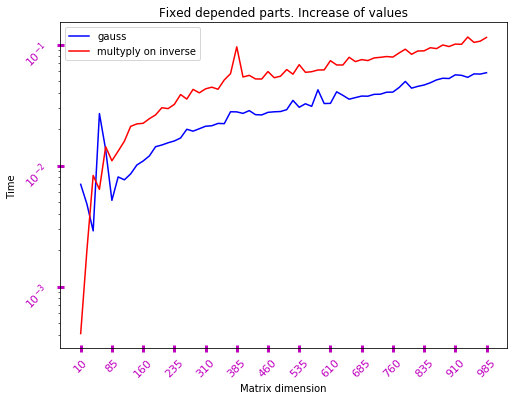

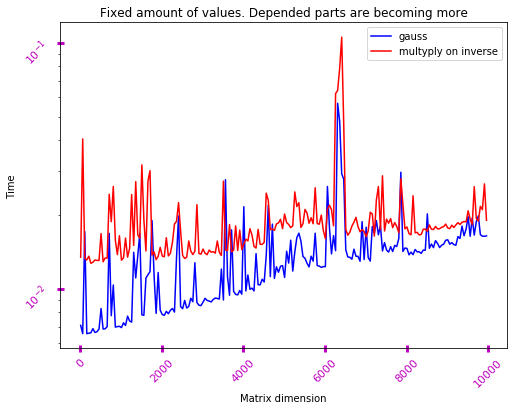

In [4]:
from time import time

way1 = []
way2 = []

dimention1 = range(10, 1000, 15)
dimention2 = range(10, 10000, 50)

def gauss(mat_a, mat_b):
    startt = time()
    sla.solve(mat_a, mat_b)
    endt = time()
    return endt - startt


def multyply_on_inverse(mat_a, mat_b):
    startt = time()
    det_a = sla.det(mat_a)
    if det_a != 0:
        a_inv = sla.inv(mat_a)
        a_inv.dot(mat_b)
    endt = time()
    return endt - startt

def way1():
    arr = []
    m = 10
    timings1 = []
    timings2 = []
    for n in dimention1:
        a = np.random.rand(n, n)
        b = np.random.rand(n, m)
        time_g = gauss(a, b)
        time_i = multyply_on_inverse(a, b)
        timings1.append(time_g)
        timings2.append(time_i)
    arr.append(timings1)
    arr.append(timings2)
    return arr

def way2():
    arr = []
    n = 100
    timings1 = []
    timings2 = []
    for m in dimention2:
        a = np.random.rand(n, n)
        b = np.random.rand(n, m)
        time_g = gauss(a, b)
        time_i = multyply_on_inverse(a, b)
        timings1.append(time_g)
        timings2.append(time_i)
    arr.append(timings1)
    arr.append(timings2)
    return arr

way1 = way1()
way2 = way2()

plt.figure(figsize=(8, 6))
plt.plot(dimention1,way1[0], color='blue', label='gauss')
plt.plot(dimention1, way1[1], color='red', label='multyply on inverse')
plt.title('Fixed depended parts. Increase of values')
plt.ylabel('Time')
plt.yscale("log")
plt.xlabel('Matrix dimension')
plt.xticks(np.arange(10, 1000, 75))
plt.legend()
plt.tick_params(axis = 'both',    #  Применяем параметры к обеим осям
               which = 'major',    #  Применяем параметры к основным делениям
               direction = 'inout',    #  Рисуем деления внутри и снаружи графика
               length = 7,    #  Длинна делений
               width = 3,     #  Ширина делений
               color = 'm',    #  Цвет делений
               pad = 5,    #  Расстояние между черточкой и ее подписью
               labelsize = 11,    #  Размер подписи
               labelcolor = 'm',    #  Цвет подписи
               bottom = True,    #  Рисуем метки снизу
               left = True,    #  слева
               labelbottom = True,    #  Рисуем подписи снизу
               labelleft = True,    #  слева
               labelrotation = 45)    #  Поворот подписей
plt.show()
plt.figure(figsize=(8, 6))
plt.plot(dimention2,way2[0], color='blue', label='gauss')
plt.plot(dimention2, way2[1], color='red', label='multyply on inverse')
plt.title('Fixed amount of values. Depended parts are becoming more')
plt.ylabel('Time')
plt.yscale("log")
plt.xlabel('Matrix dimension')
plt.legend()
plt.tick_params(axis = 'both',    #  Применяем параметры к обеим осям
               which = 'major',    #  Применяем параметры к основным делениям
               direction = 'inout',    #  Рисуем деления внутри и снаружи графика
               length = 7,    #  Длинна делений
               width = 3,     #  Ширина делений
               color = 'm',    #  Цвет делений
               pad = 5,    #  Расстояние между черточкой и ее подписью
               labelsize = 11,    #  Размер подписи
               labelcolor = 'm',    #  Цвет подписи
               bottom = True,    #  Рисуем метки снизу
               left = True,    #  слева
               labelbottom = True,    #  Рисуем подписи снизу
               labelleft = True,    #  слева
               labelrotation = 45)    #  Поворот подписей

plt.show()

Прежде чем делать выводы рассмотрим каждый из этих способов отдельно. Про метод Гаусса сказать практически нечего: ну приводит матрицу к ступенчатову виду, ну к улучшенному ступенчатому виду, всё это элементарными преобразованиями. Как бы, ничего особенного, я тоже так умею. Но вот метод домножения на обратную матрицу, уже представляет интерес, а именно метод поиска этой обратной матрицы. Насколько я знаю, есть два способа найтиобратную матрицу: 

1) Через страшную, неприятную формулу, находя по пути матрицу алгебраических дополнений.

2) Решить матричное уравнение $AB = E$, где $A \in \mathbb{R}^{n\times{n}}$, а B - обратная ей матрица того же порядка.

И, на самом деле, уже в этот момент можно взглянуть на графики, и увидеть, что в некоторых промежутков график метода Гаусса почти в точности повторяет график решения через поиск обратной матрицы. Вот теперь можно писать по заданию.

Рассмотрим сначала первый эксперимент: как можно увидеть из графика, на небольших порядках (где-то до 85) 
    решение через поиск обратной матрицы в разы быстрее метода Гаусса, что наверняка связано с тем, что 
    посчитать n определителей для матрицы алгебраических дополнений всё же быстрее, чем сначала привести матрицу
    к ступенчатому виду, а потом поийти с конца и привести её к улучшенному ступенчатому виду.

Кстати говоря, про количество операций, для каждого из способов:  
Метод Гаусса:  
1) Чтобы обнулить всле элементы, находящиеся под элементом на ступеньке нужно $n$ раз посчитать коэффициент умножения
    для элементарного преобразования первого типа, и сделать, соответственно $n$ вычитаний (будем считать, что вычитание
    строк происходит мгновенно).  
      
2) После такого обнуления переходим к следующей строчке, и обнуляем все элементы под ведущим элементом в ней. Т.к. матрица коэффициентов у нас в данном случае всегда квадратная, то ведущие элементы расположатся на диагонали, и следовательно нам потребуется $n - 1$ раз посчитать коэффициент умножения и сделать $n - 1$ вычитаение, и т.д.  

3) В какой-то момент может потребоваться поменять строчки местами, чтобы не возникало деление на 0, но это будет очень быстрая операция, т.к. уйдёт O(1) на поиск ненулевой строки и O(1) на их свап. На самом деле можно сказать, что чтобы привести матрицу методом Гаусса к ступенчатому виду, потребуется O($n^2$) операций.  

4) После того как матрица приведена к ступенчатому виду, нужно привести её к улучшенному ступенчатому виду. Как бы это сделал я: не заморачивался бы, а просто транспонировал матрицу ступенчатого вида (напомню, она у нас квадратная, нас интересует только квадратная), она бы стала нижнетреугольной, и дальше ещё раз запустить на ней алгоритм, описаный выше. Стоит только заметить, что после того, как мы обнулили все элементы под ведущим, нам нужно разделить всю строку на величину его ведущего элемента, чтобы ведущий элемент был единичным. Но такое деление тоже происходит за O(1).  
Итого имеем O($n^2$) на ступенчатый вид, O(1) на транспонирование, O($n^2$) на ступенчатый вид ещё раз, всего получается 
2O($n^2$) = O($n^2$) операций на метод Гаусса.

Про обратную матрицу я не буду всё так подробно расписывать:  
1) Считаем определитель исходной матрицы (самый оптимальный алгоритм подсчёта определителя за O($n^2$))
2) Находим n дополнительных миноров порядка $(n - 1)\times(n - 1)$  
3) Считаем алгебраические дополнения (O(n^2) для каждого элемента исходной матрицы)
4) Транспонируем матрицу алгебраических дополнений и умножаем на определитель исходной матрицы в минус первой степени.
Таким образом имеем O(n^2) на первый определитель, $nO((n - 1)^2)$ для алгебраических дополнений, ну и дальше по мелочи.
Итого алгоритм сработает за $O(n^3)$ чтобы всё честно посчитать, и за $O(n^2)$, если исходная матрица вырождена. 

Обратно к графикам (всё ещё первый эксперимент): когда порядок матрицы достигает отметки в 85, уже становится заметно, как метод Гаусса уделывает обратную матрицу, которая, вопреки ожиданиям, не уход резко вверх. Видимо, алгоритм начинает честно считать алгебраические дополнения, но в какой-то момент забивает и переходит к методу Гаусса. Ну и дальше можно заметить, что чем больше порядок матриц, тем больше разрыв между графиками, из чего можно сделать  
    ***Вывод:*** На небольших порядках (в пределах 85) логичнее использовать домножение на обратную матрицу, в то время как на больших порядках метод Гаусса показывается себя гораздо более эффективным.

Во втором эксперименте мы зафиксировали порадок матрицы коэффициентов, и увеличивали только количество столбцов в матрице свободных членов. На этом ксперименте, т.к. порядок матрицы коэффициентов мы зафиксировали небольшой,можно заметить, что домножение на противоположную матрицу ведёт себя +\- линейно, т.к. алгоритму, видимо, никогда не впадлу посчитать 100 алгебраических дополнений. На самом деле сам процесс поиска обратной матрицы д этом случа можно считать константой, так как он вообще не зависит от размера матрицы свободных членов. Сколько бы столбцов мы не добавили, алгоритм посчитает 100 дополнений, посчитает определитель, и перемножит матрицы.  
С другой сторона метод Гаусса очень даже зависит от размера матрицы $B$, ведь на каждом элементарном преобразовании ему нужно вычитать строку целиком.  
На небольших порядках Гаусс всё ещё гораздо быстрее домножения на обратную, но со значительным увеличением размеров матрицы $B$ Гаусс начинает работать заметно медленнее, в то время на график домножения на обратную почти не меняется.  
***Вывод:*** При небольших размерах матрицы коэффициентов и свободных членов метод Гаусса проявляет себя эффективнее, но со значительным увеличением матрицы свободных членов метод Гаусса теряет эффективность, в отличие от домножения на обратную. Если бы порогом было не 10к столбцов матрицы $B$, мы могли бы даже наверняка увидеть, как Гаусс стал бы медленне домножения на обратную.